# Chapter 2. Preliminaries
## 2.1 Data Manipulation
### General Libraries Needed for the Course

In [1]:
import collections
import hashlib
import math
import os
import random
import re
import shutil
import sys
import tarfile
import time
import zipfile
from collections import defaultdict
import pandas as pd
import requests
from IPython import display
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

d2l = sys.modules[__name__]

In [2]:
#@save
import numpy as np

import tensorflow as tf

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

### Preliminaries

Invoking tf.range, we get evenly spaced values, starting with 0 (included) and ending at n (not included, our case - 12). By default, the interval size - [1].
Unless otherwise specified, the tensors are stored in the main computer memory and designated for CPU - based computation.

In [3]:
x = tf.range(12, dtype=tf.float32)
x

2022-07-08 12:14:09.814238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
      dtype=float32)>

To access tensor shape and size:

In [4]:
x.shape
tf.size(x)

<tf.Tensor: shape=(), dtype=int32, numpy=12>

To reshape the tensor without altering the number of elements or their values, use tf.reshape(). In our case, the vector of 12 values becomes the matrix of 3 rows and 4 columns.
We can also not specify the other dimension, if we aware of at least one. For example, we do not need to specify the number of columns if we know the number of rows as tensor is capable of figuring it out. Check how in the example of matrix y.

In [5]:
X = tf.reshape(x, (3, 4))
X

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

In [6]:
y = x.reshape(-1,4)

If we want to create several zero matrices or other variables:

In [7]:
tf.zeros((2, 3, 4)) #shape: 2 matrices, 3 rows each, 4 columns each
tf.ones((2, 3, 4)) #shape: 2 matrices, 3 rows each, 4 columns each

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

The following snippet creates a tensor with shape (3, 4). Each of its elements is randomly sampled from a standard Gaussian (normal) distribution with a mean of 0 and a standard deviation of 1. Useful for randomly  sampling the values.

In [8]:
tf.random.normal(shape=[3, 4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.9325234 , -0.12558588,  0.50218314,  0.7598414 ],
       [-0.89064795, -0.00451622, -0.5613084 ,  0.75285846],
       [ 0.50644535,  0.38225195,  0.02749106,  0.29621905]],
      dtype=float32)>

We can also specify the exact values for each element in the desired tensor by supplying a Python list (or list of lists) containing the numerical values. Here, the outermost list corresponds to axis 0, and the inner list to axis 1.

In [9]:
tf.constant([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[2, 1, 4, 3],
       [1, 2, 3, 4],
       [4, 3, 2, 1]], dtype=int32)>

### Operations


We will start with the unary scalar operators that take only one input. f:R->R.

This just means that the function is mapping from any real number onto another.
Binary scalar operators will take two inputs and will look like: f:R,R->R.

For example, given two vectors of the same shape we can produce the third vector by lifting a scalar function to element-wise vector operations.

In [10]:
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # The ** operator is exponentiation
tf.exp(x) #exponentiation

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([2.7182817e+00, 7.3890562e+00, 5.4598148e+01, 2.9809580e+03],
      dtype=float32)>

We can concatenate multiple tensors together by stacking them together end to end.
We just need to give tensors to the system and define on which axis we want to stack them together.

In [11]:
X = tf.reshape(tf.range(12, dtype=tf.float32), (3, 4))
Y = tf.constant([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
tf.concat([X, Y], axis=0), tf.concat([X, Y], axis=1)

(<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 8), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]], dtype=float32)>)

Logical statement will be defined as usual. Here is the element-wise comparison:

In [12]:
X==Y

<tf.Tensor: shape=(3, 4), dtype=bool, numpy=
array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])>

Summing all elements of the tensor can give the tensor of just one element:

In [13]:
tf.reduce_sum(X)


<tf.Tensor: shape=(), dtype=float32, numpy=66.0>

### Broadcasing Mechanism


Previously, we have done operations on the tensors of thesame shape. However, it is not necessary requirement.

Under *certain* conditions, even when shapes differ, we can still perform elementwise operations by invoking the broadcasting mechanism. This mechanism works in the following way: First, expand one or both arrays by copying elements appropriately so that after this transformation, the two tensors have the same shape. Second, carry out the elementwise operations on the resulting arrays.

In [14]:
a = tf.reshape(tf.range(3), (3, 1))
b = tf.reshape(tf.range(2), (1, 2))
a, b


(<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[0],
        [1],
        [2]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[0, 1]], dtype=int32)>)

In [15]:
a + b


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 2],
       [2, 3]], dtype=int32)>

### Indexing and Slicing

As in any Python array, the first element has index 0 and ranges are specified to include the first but before the last element. As in standard Python lists, we can access elements according to their relative position to the end of the list by using negative indices.

Thus, [-1] selects the last element and [1:3] selects the second and the third elements as follows:

In [16]:
X[-1], X[1:3]

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 8.,  9., 10., 11.], dtype=float32)>,
 <tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)>)

Tensors in TensorFlow are immutable, and cannot be assigned to. Variables in TensorFlow are mutable containers of state that support assignments. Keep in mind that gradients in TensorFlow do not flow backwards through Variable assignments.

In [17]:
X_var = tf.Variable(X)
X_var[1, 2].assign(9)
X_var

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  9.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

If we want to assign multiple elements the same value, we simply index all of them and then assign them the value. For instance, [0:2, :] accesses the first and second rows, where : takes all the elements along axis 1 (column). While we discussed indexing for matrices, this obviously also works for vectors and for tensors of more than 2 dimensions.

In [18]:
X_var = tf.Variable(X)
X_var[0:2, :].assign(tf.ones(X_var[0:2,:].shape, dtype = tf.float32) * 12)
X_var

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[12., 12., 12., 12.],
       [12., 12., 12., 12.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

### Saving Memory

Running operations can cause new memory to be allocated to host results. For example, if we write Y = X + Y, we will dereference the tensor that Y used to point to and instead point Y at the newly allocated memory. In the following example, we demonstrate this with Python’s id() function, which gives us the exact address of the referenced object in memory. After running Y = Y + X, we will find that id(Y) points to a different location. That is because Python first evaluates Y + X, allocating new memory for the result and then makes Y point to this new location in memory.

In [19]:
before = id(Y)
Y = Y + X
id(Y) == before

False

This might be undesirable for two reasons. First, we do not want to run around allocating memory unnecessarily all the time. In machine learning, we might have hundreds of megabytes of parameters and update all of them multiple times per second. Typically, we will want to perform these updates in place. Second, we might point at the same parameters from multiple variables. If we do not update in place, other references will still point to the old memory location, making it possible for parts of our code to inadvertently reference stale parameters.

Variables are mutable containers of state in TensorFlow. They provide a way to store your model parameters. We can assign the result of an operation to a Variable with assign. To illustrate this concept, we create a Variable Z with the same shape as another tensor Y, using zeros_like to allocate a block of 0 entries.

In [20]:
Z = tf.Variable(tf.zeros_like(Y))
print('id(Z):', id(Z))
Z.assign(X + Y)
print('id(Z):', id(Z))

id(Z): 140309024472800
id(Z): 140309024472800


However, TensorFlow provides the tf.function decorator to wrap computation inside of a TensorFlow graph that gets compiled and optimized before running. This allows TensorFlow to prune unused values, and to re-use prior allocations that are no longer needed. This minimizes the memory overhead of TensorFlow computations.

In [21]:
@tf.function
def computation(X, Y):
    Z = tf.zeros_like(Y)  # This unused value will be pruned out
    A = X + Y  # Allocations will be re-used when no longer needed
    B = A + Y
    C = B + Y
    return C + Y

computation(X, Y)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 8.,  9., 26., 27.],
       [24., 33., 42., 51.],
       [56., 57., 58., 59.]], dtype=float32)>

### Conversion to other Python Object

Converting to a NumPy tensor (ndarray), or vice versa, is easy. The converted result does not share memory. This minor inconvenience is actually quite important: when you perform operations on the CPU or on GPUs, you do not want to halt computation, waiting to see whether the NumPy package of Python might want to be doing something else with the same chunk of memory.

In [22]:
A = X.numpy()
B = tf.constant(A)
type(A), type(B)

(numpy.ndarray, tensorflow.python.framework.ops.EagerTensor)

To convert a size-1 tensor to a Python scalar, we can invoke the item function or Python’s built-in functions.

In [23]:
a = tf.constant([3.5]).numpy()
a, a.item(), float(a), int(a)

(array([3.5], dtype=float32), 3.5, 3.5, 3)

## 2.2 Data Preprocessing
### Reading the Dataset
Important note: pandas can work with tensors.
1. We write the dataset row by row into csv file.


In [24]:
import os
os.chdir('/Users/sofyakonchakova/Desktop/Data Science/D2AI')
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
   f.write('NumRooms,Alley,Price\n')  # Column names
   f.write('NA,Pave,127500\n')  # Each row represents a data example
   f.write('2,NA,106000\n')
   f.write('4,NA,178100\n')
   f.write('NA,NA,140000\n')

In [25]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### Handling Missing Data
Typical methods for handling missing data: imputation and deletion.
Imputation substitutes missing values by replacing missing values with substituted once.
Deletion just ignores missing values.
### Imputation
In this example we split data in inputs and ouputs. For numerical values that are missing in input, we impute mean values.


In [26]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


For categorical or discrete values in inputs, we consider “NaN” as a category. Since the “Alley” column only takes two types of categorical values “Pave” and “NaN”, pandas can automatically convert this column to two columns “Alley_Pave” and “Alley_nan”. A row whose alley type is “Pave” will set values of “Alley_Pave” and “Alley_nan” to 1 and 0. A row with a missing alley type will set their values to 0 and 1.

In [27]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### Conversion to Tensor Format
Now that all the entries in inputs and outputs are numerical, they can be converted to the tensor format. 

In [28]:
import tensorflow as tf

X, y = tf.constant(inputs.values), tf.constant(outputs.values)
X, y

(<tf.Tensor: shape=(4, 3), dtype=float64, numpy=
 array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]])>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([127500, 106000, 178100, 140000])>)

## Linear Algebra
### Scalars
We call values consisting of one numerical quantity - scalar.
A scalar is represented by tensor with just one element.

In [29]:

x = tf.constant(3.0)
y = tf.constant(2.0)

x + y, x * y, x / y, x**y

(<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>)

### Vectors
Can be thought as simly list ofscalars.
These values are called elements. We work with vectors via one-dimensional tensors. In general tensors can have arbitrary lengths, subject to the memory limits of your machine.

In [30]:
x = tf.range(4)

x

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 2, 3], dtype=int32)>

We can refer to any element of a vector using a subscript.

In [31]:
x[3]

<tf.Tensor: shape=(), dtype=int32, numpy=3>

### Length, Dimensionality and Shape

The length of a vector is commonly called the dimension of the vector. And just as any array has a length, so does a vector.
In math notation it will look like:


$$
x \in R^{n}
$$

In [32]:
len(x)
x.shape


TensorShape([4])

### Matrices
Just as vectors generalize scalars from order zero to order one, matrices generalize vectors from order one to order two. To express matrix A, we can use math notation.
$$
A \in R^{m*n}
$$
It means that matrix A contains m rows and n columns. Specifically, when a matrix has the same number of rows and columns, its shape becomes a square; thus, it is called a square matrix. We can create an m×n matrix by specifying a shape with two components m and n when calling any of our favorite functions for instantiating a tensor.


In [33]:
A = tf.reshape(tf.range(20), (5, 4))
A

<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]], dtype=int32)>

To transpose matrix, use the function below. As a special type of the square matrix, a symmetric matrix A is equal to its transpose: 
$$
A = A^{T}
$$


In [34]:
tf.transpose(A)

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[ 0,  4,  8, 12, 16],
       [ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19]], dtype=int32)>

Here we define a symmetric matrix B.

In [35]:
B = tf.constant([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tf.transpose(B)==B

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])>

### Tensors
Tensors (“tensors” in this subsection refer to algebraic objects) give us a generic way of describing n-dimensional arrays with an arbitrary number of axes. Vectors, for example, are first-order tensors, and matrices are second-order tensors. Tensors have similar to matrices indexes.

In [36]:
X = tf.reshape(tf.range(24), (2, 3, 4))
X

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=int32)>

### Basic Properties of Tensor Arithmetic
Given any two tensors with the same shape, the result of any binary elementwise operation will be a tensor of that same shape.

In [37]:
A = tf.reshape(tf.range(20, dtype=tf.float32), (5, 4))
B = A  # No cloning of `A` to `B` by allocating new memory
A, A + B

(<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]], dtype=float32)>,
 <tf.Tensor: shape=(5, 4), dtype=float32, numpy=
 array([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]], dtype=float32)>)

### Reduction
The useful function to perform on arbitrary tensors - reduction sum. This way, sum reduction leads to the sum of all elements in the tensor.

In [38]:
x = tf.range(4, dtype=tf.float32)
x, tf.reduce_sum(x)

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [39]:
A.shape, tf.reduce_sum(A)

(TensorShape([5, 4]), <tf.Tensor: shape=(), dtype=float32, numpy=190.0>)

By default, invoking the function for calculating the sum reduces a tensor along all its axes to a scalar. We can also specify the axes along which the tensor is reduced via summation. Take matrices as an example.
When we set axis = 0, we sum up elements of all rows with regard to column. Eg, sum of all row elements of the first column.

When we set axis = 1, we get all columns sum row-wise. See example below:

In [40]:
print(A)
A_sum_axis0 = tf.reduce_sum(A, axis=0)
A_sum_axis0, A_sum_axis0.shape

tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]], shape=(5, 4), dtype=float32)


(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([40., 45., 50., 55.], dtype=float32)>,
 TensorShape([4]))

In [41]:
A_sum_axis1 = tf.reduce_sum(A, axis=1)
A_sum_axis1, A_sum_axis1.shape

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 6., 22., 38., 54., 70.], dtype=float32)>,
 TensorShape([5]))

In [42]:
tf.reduce_sum(A, axis=[0, 1])  # Same as `tf.reduce_sum(A)`, reducing along rows and columns

<tf.Tensor: shape=(), dtype=float32, numpy=190.0>

In [43]:
tf.reduce_mean(A), tf.reduce_sum(A) / tf.size(A).numpy()

(<tf.Tensor: shape=(), dtype=float32, numpy=9.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.5>)

In [44]:
tf.reduce_mean(A, axis=0), tf.reduce_sum(A, axis=0) / A.shape[0] #reducing along the specified axes

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 8.,  9., 10., 11.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 8.,  9., 10., 11.], dtype=float32)>)

However, sometimes it can be useful to keep the number of axes unchanged when invoking the function for calculating the sum or mean.


In [45]:
sum_A = tf.reduce_sum(A, axis=1, keepdims=True)
sum_A

A / sum_A

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0.        , 0.16666667, 0.33333334, 0.5       ],
       [0.18181819, 0.22727273, 0.27272728, 0.3181818 ],
       [0.21052632, 0.23684211, 0.2631579 , 0.28947368],
       [0.22222222, 0.24074075, 0.25925925, 0.2777778 ],
       [0.22857143, 0.24285714, 0.25714287, 0.27142859]], dtype=float32)>

If we want to calculate the cumulative sum of elements of A along some axis, say axis=0 (row by row), we can call the cumsum function. This function will not reduce the input tensor along any axis.

In [46]:
tf.cumsum(A, axis=0)

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  6.,  8., 10.],
       [12., 15., 18., 21.],
       [24., 28., 32., 36.],
       [40., 45., 50., 55.]], dtype=float32)>

### Dot Products
The most fundamental operation is dot function. Given two vectors $$ x,y \in R^{d} $$, their dot product $$ x^{T}y \space or \space <x,y>$$  is a sum over the products of the elements at the same position



In [47]:
y = tf.ones(4, dtype=tf.float32)
x, y, tf.tensordot(x, y, axes=1)

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [48]:
tf.reduce_sum(x * y)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

Expressing matrix-vector products in code with tensors, we use the matvec function. When we call tf.linalg.matvec(A, x) with a matrix A and a vector x, the matrix-vector product is performed. Note that the column dimension of A (its length along axis 1) must be the same as the dimension of x (its length).

In [49]:
A.shape, x.shape, tf.linalg.matvec(A, x)

(TensorShape([5, 4]),
 TensorShape([4]),
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 14.,  38.,  62.,  86., 110.], dtype=float32)>)

### Matrix - Matrix Multiplication

In [50]:
B = tf.ones((4, 3), tf.float32)
tf.matmul(A, B)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 6.,  6.,  6.],
       [22., 22., 22.],
       [38., 38., 38.],
       [54., 54., 54.],
       [70., 70., 70.]], dtype=float32)>

### Norms
Some of the most useful operators in linear algebra are norms. Informally, the norm of a vector tells us how big a vector is. Shows the distance of origin. The notion of size under consideration here concerns not dimensionality but rather the magnitude of the components.

In linear algebra, a vector norm is a function f that maps a vector to a scalar, satisfying a handful of properties. 

Given any vector x, the first property says that if we scale all the elements of a vector by a constant factor α, its norm also scales by the absolute value of the same constant factor:

$$
f(\alpha x)=\left | \alpha \right |f(x)
$$

The second property is the familiar triangle inequality:
$$
f(x+y)\leqslant f(x)+f(y)
$$

The third property is norm should be non-negative:

$$
f(x)\geq 0
$$

The last  property - smallest norm is achieved only when vector consists of zeros.

Euclidean distance is also a norm. It is specified as L_2 norm. It is calculated in the code.

In [51]:
u = tf.constant([3.0, -4.0]) #L_2 norm
tf.norm(u)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [52]:
tf.reduce_sum(tf.abs(u)) #L_1 norm which is calculated as an absolute sum

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

Frobenius norm is similar to the L_2 norm but specified as square root of the sum of the squares of the matrix elements. Satisfies all the properties of vector norms.

In [53]:
tf.norm(tf.ones((4, 9)))

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

### Summary
Elementwise multiplication of two matrices is called their Hadamard product. It is different from matrix multiplication.
In deep learning, we often work with norms such as the L1 norm, the L2 norm, and the Frobenius norm.

### 2.3.13 Exercises
1.Prove that the transpose of a matrix A’s transpose is A: (A⊤)⊤=A. 

In [54]:
A = tf.reshape(tf.range(20, dtype=tf.float32), (5, 4))


In [55]:
A_t = tf.transpose(A)
A_t_t = tf.transpose(A_t)
A_t_t == A

<tf.Tensor: shape=(5, 4), dtype=bool, numpy=
array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])>

2. Given two matrices A and B, show that the sum of transposes is equal to the transpose of a sum

In [56]:
A = tf.reshape(tf.range(20, dtype=tf.float32), (5, 4))

B = tf.reshape(tf.ones(20), (5,4))

In [57]:
sum_transpose = tf.transpose(A+B)
transp_sum = tf.transpose(A)+tf.transpose(B)
sum_transpose == transp_sum

<tf.Tensor: shape=(4, 5), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])>

3. Given any square matrix A, is A+A⊤ always symmetric? Why?

Because equal matrices have equal dimensions, only square matrices can be symmetric. and. Every square diagonal matrix is symmetric, since all off-diagonal elements are zero. 

In [58]:
C = tf.reshape(tf.range(4, dtype=tf.float32), (2, 2))
C_trans = tf.transpose(C)
D = C_trans + C
D_transp = tf.transpose(D)
D == D_transp

<tf.Tensor: shape=(2, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True]])>

4. We defined the tensor X of shape (2, 3, 4) in this section. What is the output of len(X)?

In [59]:
X = tf.reshape(tf.range(24), (2, 3, 4))
len(X)

2

In [60]:
print(A)

#A/A.sum(axis=1)

#tensorflow object has no attribute sum()

tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]], shape=(5, 4), dtype=float32)


## Calculus
### Derivatives and Differentiation

Suppose we have a function that has input and output both scalars.
$$
f: R \rightarrow R

$$
Then the derivative of x is defined as:

$$
f'(x)=\lim_{h\rightarrow 0} \frac {f(x+h)-f(x)}{h}

$$

If the limit exists for the function f(a) for example, it is said to be differentiable at a. If f is differentiable at every number of an interval, then this function is differentiable on this interval. 
Let us experiment with an example.
$$
u = f(x) = 3x^{2}- 4x
$$


In [61]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
import tensorflow as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [62]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


Further code is the visual interpretation of the derivatives

In [63]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [64]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [65]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [66]:
from d2l import tensorflow as d2l

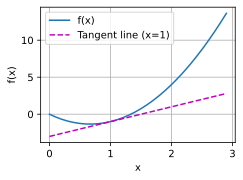

In [67]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

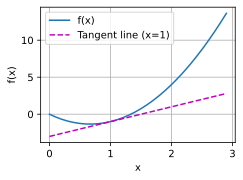

In [68]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### Partial Derivatives
So far we have dealt with the differentiation of functions of just one variable. In deep learning, functions often depend on many variables. Thus, we need to extend the ideas of differentiation to these multivariate functions.
Then we treat other variables as constants.

### Gradients
We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain the gradient vector of the function. 
Suppose, we have the input function:
$$
f: R^{n} \rightarrow R
$$
where input is an n-dimensional vecor x
$$
x = [x_{1},x_{2},...,x_{n}]^{T}
$$

The gradient function f(x) with respect to x is a vector of n partial derivatives:

$$
\nabla_{x}f(x)= \left[ \frac {\sigma f(x)}{\sigma x_{1}}, \frac {\sigma f(x)}{\sigma x_{2}},...,\frac {\sigma f(x)}{\sigma x_{n}} \right]^{T}
$$

### Chain Rule
Gradients are hard to find as deep learing are often composite, so we may not apply the rules to differentiate these functions. Fortunately, chain rule is useful for differentiating such functions.

$$

\frac {d_{y}}{d_{x}}=\frac {d_{y}}{d_{u}}   \frac {d_{u}}{d_{x}}

$$

where y = f(u) and u = g(x)

## 2.5 Automatic Differentiation
Deep learning frameworks expedite this work by automatically calculating derivatives, i.e., automatic differentiation. In practice, based on our designed model the system builds a computational graph, tracking which data cmobined through which operations to produce the output. Automatic differentiation enables the system to subsequently backpropagate gradients. Here, backpropagate simply means to trace through the computational graph, filling in the partial derivatives with respect to each parameter.


Toy example, we are interested in differentiating the function

$$
y = 2x^{T}x

$$
with respect to a column vector x.

In [69]:
import tensorflow as tf
x = tf.range(4, dtype = tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [70]:
x = tf.Variable(x) #not to allocate additional memory

In [71]:
# Record all computations onto a tape
with tf.GradientTape() as t:
    y = 2 * tf.tensordot(x, x, axes=1)
y

<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

x is a vector of 4, an dot product of x and x is performed, yielding the scalar output that we assign to y. Next, we can automatically calculate the gradient of y with respect to each component of x by calling the function and printing the gradient.

In [72]:
x_grad = t.gradient(y, x)
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

The gradient of the function we named before should be 4x. Let's verify:

In [73]:
x_grad == 4 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [74]:
with tf.GradientTape() as t:
    y = tf.reduce_sum(x)
t.gradient(y, x)  # Overwritten by the newly calculated gradient

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

### Backward for Non-Scalar Variables
When y is not a scalar, the most natural interpretation of the differentiation of a vector y with respect to a vector x is a matrix.
For higher order and higher-dimensional x and y, it can result in a high-order tensor.

In [75]:
with tf.GradientTape() as t:
    y = x * x
t.gradient(y, x)  # Same as `y = tf.reduce_sum(x * x)`

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>

### Detaching Computation

Sometimes we wish to have some calculations outside of the recorded computational graph.
E.g. say that y was calculated as a function of x, and z was subsequently calculated as a function of both x and y.
Now imagine we want to calculate the gradient of z with respect to x, but want to treat y only as a constant.
Here, we can detach y to return a new variable u that has the same value as y but discards any information on how it was computed in the computational graph. It wull not flow backwards through u to x.

In [76]:
# Set `persistent=True` to run `t.gradient` more than once
with tf.GradientTape(persistent=True) as t:
    y = x * x
    u = tf.stop_gradient(y)
    z = u * x

x_grad = t.gradient(z, x)
x_grad == u

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [77]:
# invoking backpropagation as we know how the y was created
t.gradient(y, x) == 2 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

### Computing the Gradient of Python Control Flow
The advantage of using automatic differentiation, we can invoke the gradient function even if the function itself was built with many different python features and functions.

In [78]:
def f(a):
    b = a * 2
    while tf.norm(b) < 1000:
        b = b * 2
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = 100 * b
    return c

In [79]:
a = tf.Variable(tf.random.normal(shape=()))
with tf.GradientTape() as t:
    d = f(a)
d_grad = t.gradient(d, a)
d_grad

<tf.Tensor: shape=(), dtype=float32, numpy=409600.0>

In [80]:
d_grad == d/a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Probability
### Basic Probability Theory
One natural approach for each value is to take the individual count for that value and to divide it by the total number of tosses. This gives us an estimate of the probability of a given event. The law of large numbers tell us that as the number of tosses grows this estimate will draw closer and closer to the true underlying probability. 


In [84]:
#importing necessary packages
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l


Next, we are casting a die.
The process of drawing examples from propbability distribution - *sampling*.
The distribution that assigns probabilities to a number of discrete choices is called the multinomial distribution.  

In [85]:
fair_probs = tf.ones(6) / 6
tfp.distributions.Multinomial(1, fair_probs).sample()


<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0.], dtype=float32)>

For drawing multiple samples at once:


In [86]:
tfp.distributions.Multinomial(10, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([1., 1., 0., 3., 2., 3.], dtype=float32)>

Now that we know how to sample rolls of a die, we can simulate 1000 rolls. We can then go through and count, after each of the 1000 rolls, how many times each number was rolled. Specifically, we calculate the relative frequency as the estimate of the true probability.

In [87]:
counts = tfp.distributions.Multinomial(1000, fair_probs).sample()
counts / 1000


<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.183, 0.146, 0.165, 0.158, 0.176, 0.172], dtype=float32)>

To visualise how these probabilities converge over time towards true probabilities, run the code below.
Note, black line gives the true underlying probability.


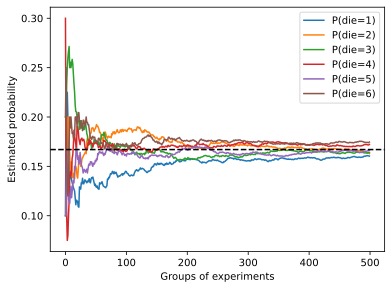

In [88]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(500)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

### Axioms of Probability Theory
When dealing with the rolls of die, the set S = {1,2,3,4,5,6} - the sample space or outcome space, where each element is an outcome.
An event is a set of outcomes from a given sample space. For instance, seeing {5} or seeing an odd number {1,3,5} are both valid events of rolling a die.
If the outcome of a random experience is an event A, then event A has occured. 

Formally, probability can be thought of as a function that maps a set to a real value.
The probability of an event A in the given sample space S, denoted P(A) statisfies the following properties: (Kolmogorov, 1933)
1. For any event A, its probability is never negative
2. Probability of the entire sample space is 1, P(S)=1
3. For any countable sequence of events A1,A2,... that are mutually exclusive, the probability that any happens is equal to the sum of their individual probabilities.
   $$ 
   A_{i} \cap A_{j} = 0 \space and \space P(U^{\infty}_{i01} A_{i})= \sum^{\infty} _{i=1} P(A_{i})
   $$

### Random Variables
A random variable can be pretty much any quantity and is not deterministic. It could take one value among a set of possibilities in a random experiment.

For a compact notation:
* P(X) - distribution over random variable X, the distribution tells us the probability that X takes any value.
* P(a) - probability that a random variable will take value a.

Important to state difference between continuous and discrete variables. For continuous variables, it makes more sense to count if the value falls in the range.

### Dealing with Multiple Random Variable

### Joint Probability
P(A=a, B= b). Given any values a and b, the joint probability considers: whatr is the probability  that A=a and B=b simultaneously.
Note that for any values a and b,

$$
P(A=a, B=b) \leq P(A=a)
$$

### Conditional Probability
Shows the probability of B=b, provided that A=a has occured.
$$
0 \leq \frac{P(A=a,B=b)}{P(A=a)} \leq 1
$$

### Bayes´ Theorem
Using the definition of conditional probability, the celebrated equation - Bayes' Theorem can be derived.
Note:
* P(A|B) - conditional distribution
* P(A,B) - joint distribution
$$
P(A|B) = \frac {P(B|A)P(A)}{P(B)}

$$

### Marginalisation
Bayes' theorem is useful when we want to infer one thing from the other (cause and effect).
But we know the properties in the reverse direction. Them we need one important operation, marginalisation, determining P(B) from P(A,B).
The probability of P(B) amounts to accounting for all possible choices of A and aggregating the joint probability over all of them. Known as a sum rule. The probability of distribution as a result of marginalisation is called a marginal probabiity or marginal distribution.
$$
P(B) = \sum_{A} P(A,B)
$$

### Independence
Two variables being independent means that the occurence of one event A does not reveal any information about the occurence of an event B.
In this case, P(B|A) = P(B). And in mathematical notation, 

$$
A \perp B \space or \space A\perp B |C
$$
Two random variables are independent if and only if their joint distribution is the product of their individual distributions.

## Documentation

In [ ]:
import tensorflow as tf

print(dir(tf.random))

help(tf.ones)